<a href="https://colab.research.google.com/github/khamesi1985/2025/blob/main/DT_for_WDBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy On Train Data =  0.9668737060041408
              precision    recall  f1-score   support

           B       0.99      0.96      0.97       303
           M       0.93      0.98      0.96       180

    accuracy                           0.97       483
   macro avg       0.96      0.97      0.96       483
weighted avg       0.97      0.97      0.97       483

TP On Train Data =  177
TN On Train Data =  290
FP On Train Data =  13
FN On Train Data =  3
Accuracy On Test Data =  0.9302325581395349
              precision    recall  f1-score   support

           B       0.96      0.93      0.94        54
           M       0.88      0.94      0.91        32

    accuracy                           0.93        86
   macro avg       0.92      0.93      0.93        86
weighted avg       0.93      0.93      0.93        86

TP On Test Data =  30
TN On Test Data =  50
FP On Test Data =  4
FN On Test Data =  2


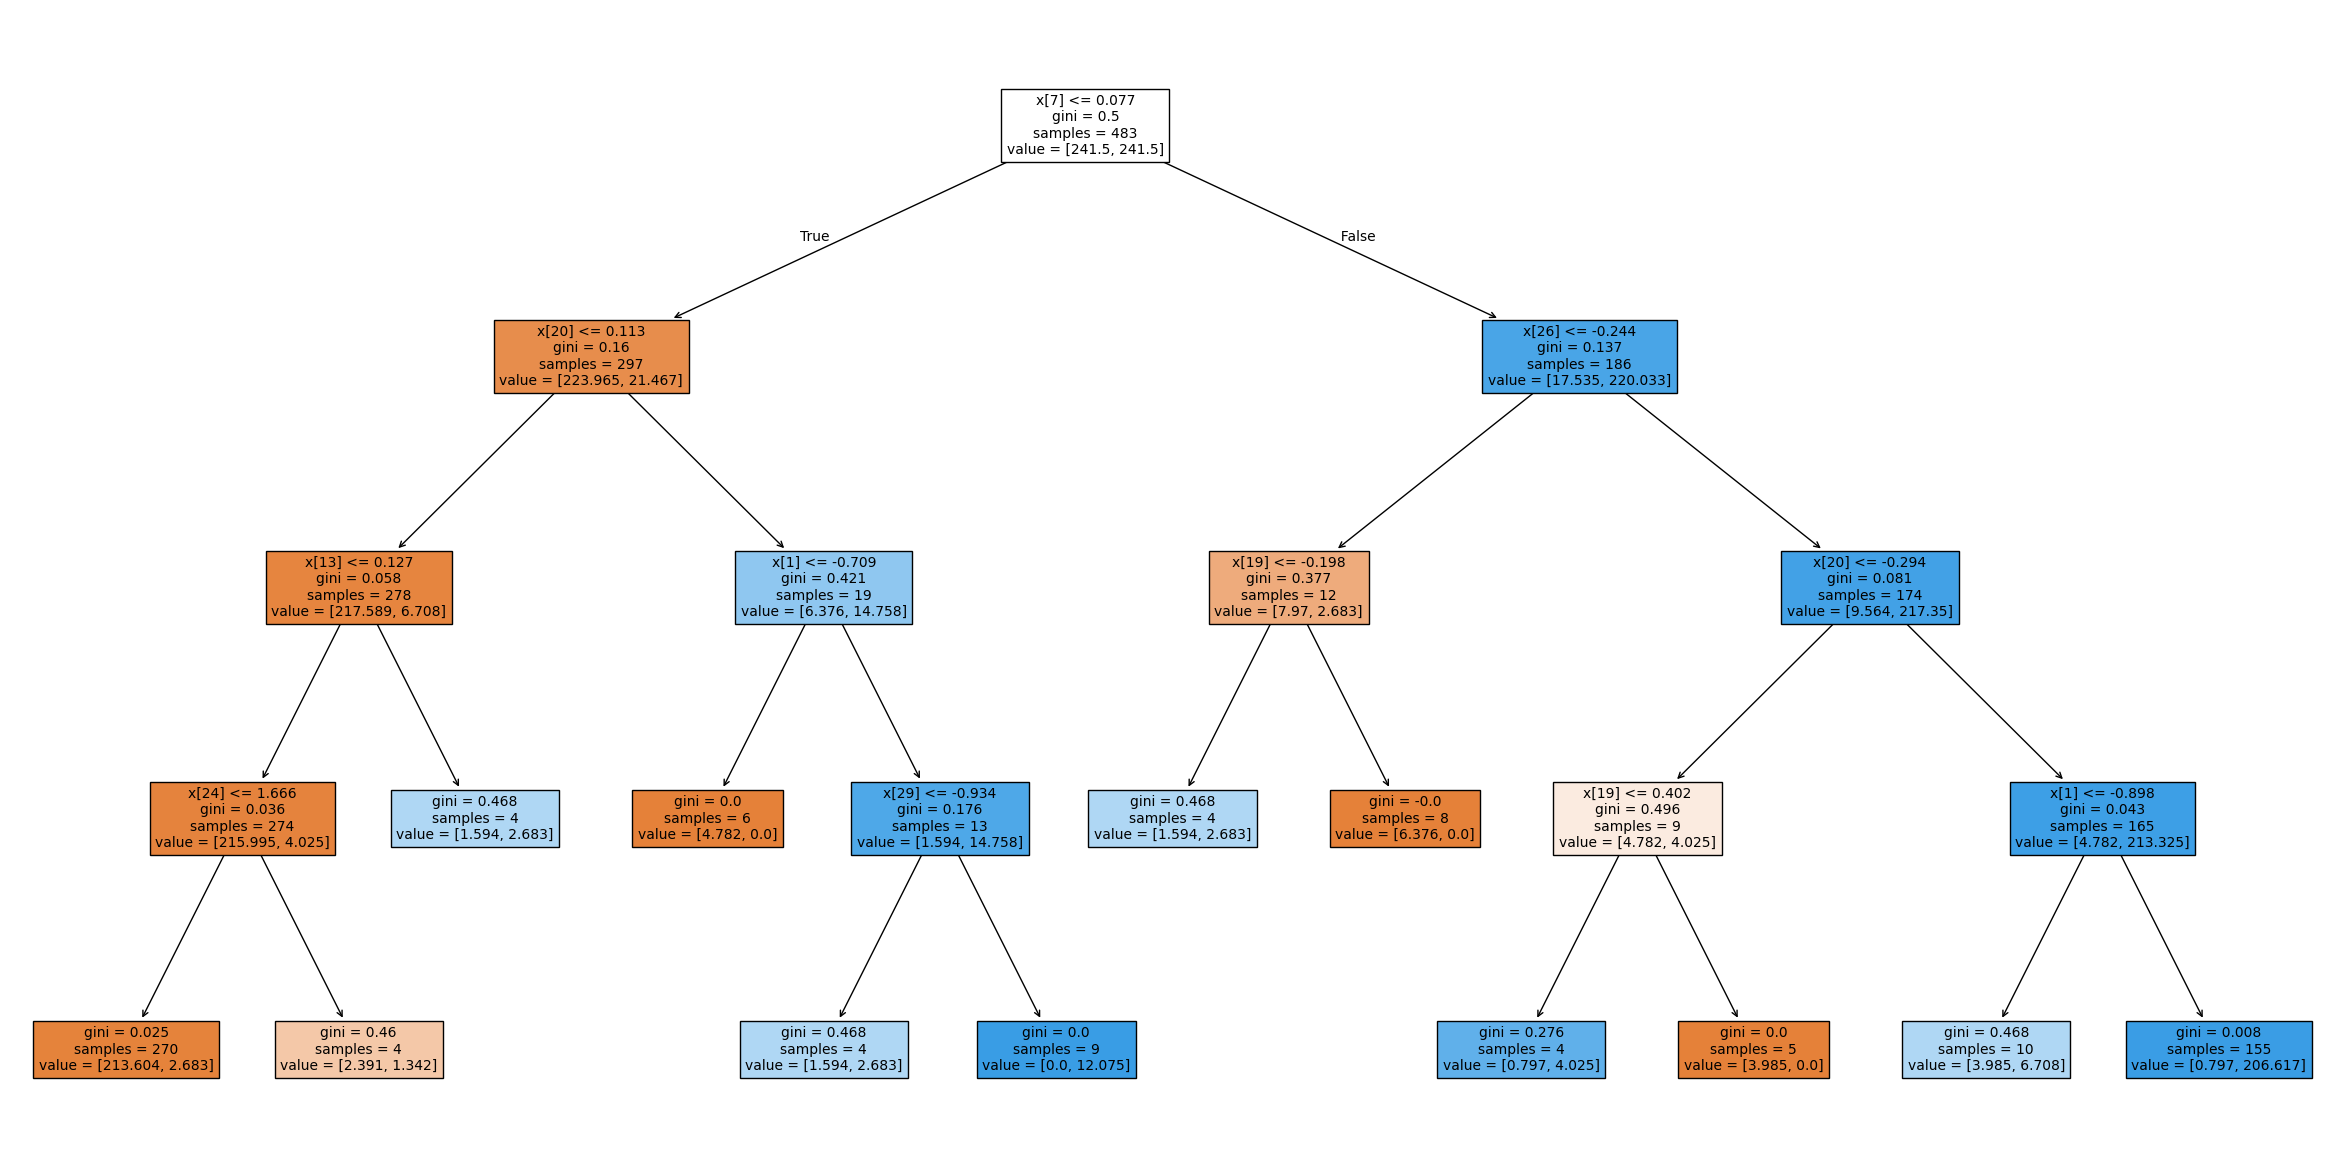

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report

# بارگذاری داده‌ها
url = "https://raw.githubusercontent.com/khamesi1985/2025/main/wdbc.data"
data = pd.read_csv(url, header=None)
X = data.iloc[:, 2:32]
Pre_Y = data.iloc[:, 1]
make_bin = LabelEncoder()
Y = make_bin.fit_transform(Pre_Y)

# تقسیم داده‌ها به آموزش و آزمون
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# استاندارد سازی داده ها
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# پیاده سازی مدل
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=8, min_samples_leaf=4, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, Y_train)
Y_pred_train = model.predict(X_train_scaled)
Y_pred_test = model.predict(X_test_scaled)

# محاسبه دقت مدل
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
print("Accuracy On Train Data = ", accuracy_train)
print(classification_report(Y_train, Y_pred_train, target_names=make_bin.classes_))
len_train = len(Y_train)
TN = TP = FN = FP = 0
for i in range (len_train):
  if Y_train[i] == 0 and Y_pred_train[i] == 1:
    FP = FP + 1
  elif Y_train[i] == 1 and Y_pred_train[i] == 0:
    FN = FN + 1
  elif Y_train[i] == 1 and Y_pred_train[i] == 1:
    TP = TP + 1
  elif Y_train[i] == 0 and Y_pred_train[i] == 0:
    TN = TN + 1
print("TP On Train Data = ", TP)
print("TN On Train Data = ", TN)
print("FP On Train Data = ", FP)
print("FN On Train Data = ", FN)
print("Accuracy On Test Data = ", accuracy_test)
print(classification_report(Y_test, Y_pred_test, target_names=make_bin.classes_))
len_test = len(Y_test)
TN = TP = FN = FP = 0
for i in range (len_test):
  if Y_test[i] == 0 and Y_pred_test[i] == 1:
    FP = FP + 1
  elif Y_test[i] == 1 and Y_pred_test[i] == 0:
    FN = FN + 1
  elif Y_test[i] == 1 and Y_pred_test[i] == 1:
    TP = TP + 1
  elif Y_test[i] == 0 and Y_pred_test[i] == 0:
    TN = TN + 1
print("TP On Test Data = ", TP)
print("TN On Test Data = ", TN)
print("FP On Test Data = ", FP)
print("FN On Test Data = ", FN)

# ترسیم گراف درخت تصمیم
plt.figure(figsize=(30, 15))
tree.plot_tree(model, filled=True, fontsize=10)
plt.show()